## Cargamos datos

In [3]:
import pandas as pd
import numpy as np

# Read dataset
df = pd.read_csv('datos_no_balanceados.csv')

# Display example observations
df.tail(10)


,client,var1,var2,var3,var4
615,0,5,5,4,1
616,0,5,5,4,2
617,0,5,5,4,3
618,0,5,5,4,4
619,0,5,5,4,5
620,0,5,5,5,1
621,0,5,5,5,2
622,0,5,5,5,3
623,0,5,5,5,4
624,1,5,5,5,5


In [8]:
df["var4"].unique()

array([1, 2, 3, 4, 5])

## Comprobamos cuantos clientes hay de cada clase

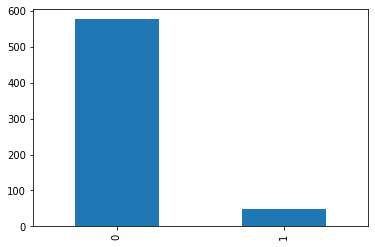

In [10]:
import matplotlib.pyplot as plt
df['client'].value_counts().plot.bar()


In [11]:
print(df['client'].value_counts())

0    576
1     49
Name: client, dtype: int64


# Dividimos en train y test

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
# Separate input features (X) and target variable (y)
y = df.client
X = df.drop('client', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [40]:
## Realizamos una clasificación
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=7).fit(X_train, y_train)
#pd.DataFrame(data = {"predict":clf.predict(X_test), "real": y_test})

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#clf.feature_importances_

Accuracy of Decision Tree classifier on training set: 0.94
Accuracy of Decision Tree classifier on test set: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## ¿Con la accuracy que hemos obtenido esta bien?
Hemos obtenido un 92% de acierto sobre los datos de test. 
¿hemos cumplido con nuestro cometido?

In [43]:
# Guardamos los valores que hemos predecido:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(X_test)

print(confusion_matrix(y_true, y_pred))

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))
print("True Positive: " + str(tp))

[[145   4]
 [  8   0]]
True Negative: 145
False Positive: 4
False Negative: 8
True Positive: 0


In [44]:
# predictions = clf.predict_proba(Xtest)


## Absolutamente no hemos cumplido nuestros objetivos

## Opción 1: Upsample la categoría minoritaria

In [45]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.client==0]
df_minority = df[df.client==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=576,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.client.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    576
0    576
Name: client, dtype: int64

In [47]:
# Separate input features (X) and target variable (y)
y = df_upsampled.client
X = df_upsampled.drop('client', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train model
clf = RandomForestClassifier().fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = clf.predict(X_test)
 
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
# Guardamos los valores que hemos predecido:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(X_test)

print(confusion_matrix(y_true, y_pred))

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))
print("True Positive: " + str(tp))

[[128   7]
 [  0 153]]
True Negative: 128
False Positive: 7
False Negative: 0
True Positive: 153


## Opción 2: Downsample la categoría mayoritaria


In [49]:
# Separate majority and minority classes
df_majority = df[df.client==0]
df_minority = df[df.client==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                replace=False,    # sample without replacement
                                n_samples=49,     # to match minority class
                                random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.client.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

1    49
0    49
Name: client, dtype: int64

In [51]:
# Separate input features (X) and target variable (y)
y = df_downsampled.client
X = df_downsampled.drop('client', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train model
clf = RandomForestClassifier().fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = clf.predict(X_test)
 
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
    .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.48


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
# Guardamos los valores que hemos predecido:
#from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(X_test)

print(confusion_matrix(y_true, y_pred))

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))
print("True Positive: " + str(tp))

[[7 6]
 [7 5]]
True Negative: 7
False Positive: 6
False Negative: 7
True Positive: 5


## Otras técnicas: ROC Curve, darle pesos al algoritmo

In [55]:
# Separate input features (X) and target variable (y)
y = df.client
X = df.drop('client', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [56]:
# import matplotlib.pyplot as plt

# y_true = # ground truth labels
# y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()

In [61]:
# Train model
clf = RandomForestClassifier(class_weight={0:50,1:500}).fit(X_train, y_train)
 
# Predict on training set
pred_y_1 = clf.predict(X_test)
 
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
    .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
    .format(clf.score(X_test, y_test)))

# Guardamos los valores que hemos predecido:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(X_test)

print(confusion_matrix(y_true, y_pred))

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))
print("True Positive: " + str(tp))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.92
[[144   5]
 [  8   0]]
True Negative: 144
False Positive: 5
False Negative: 8
True Positive: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
